In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import torchvision
import numpy as np
import torch
import cv2

from PIL import Image
from transform_factory import resize_322, center_crop_224, imagenet_normalize, tensorize, get_spatial_transform, get_color_transform
from torchvision import transforms
from expl import ExplFactory
from captum.attr import visualization as viz
from torchvision.models import resnet50, ResNet50_Weights
from matplotlib.colors import LinearSegmentedColormap


In [56]:
def mismatch_rate(orig_expl, conf_high, conf_low):
    pos_mismatch = np.where(np.logical_and(orig_expl > 0, conf_low < 0))
    neg_mismatch = np.where(np.logical_and(orig_expl < 0, conf_high > 0))

    total_pixel = np.prod(orig_expl.shape)
    total_mismatch = len(pos_mismatch[0]) + len(neg_mismatch[0])
    print(len(pos_mismatch[0]))
    print(len(neg_mismatch[0]))
    return total_mismatch / total_pixel

In [6]:
orig_img_path = "/home/juhyeon/Imagenet/train/n02100236/n02100236_390.JPEG"

cv2_img = cv2.imread(orig_img_path)

print(type(cv2_img))
orig_img = Image.open(orig_img_path)

print(type(orig_img))
_orig_img = tensorize(center_crop_224(resize_322(orig_img))).unsqueeze(0).cuda()
_orig_img = np.transpose(_orig_img.squeeze().cpu().detach().numpy(), (1,2,0))


with open("results/20230203_pred_orig_eval_orig_transform_both_sign_all_reduction_mean/n02100236_390.JPEG_expl_InputXGrad_alpha_0.1_sample_10000_sigma_0.05_seed_0.npy", "rb") as f:
    orig_expl = np.load(f)
    conf_low = np.load(f)
    conf_high = np.load(f)

print(orig_expl.shape)
print(conf_high.shape)
print(conf_low.shape)

orig_expl = np.transpose(orig_expl, (1,2,0))
conf_high = np.transpose(conf_high, (1,2,0))
conf_low = np.transpose(conf_low, (1,2,0))

default_cmap = LinearSegmentedColormap.from_list('custom blue', 
                                                 [(0, '#ffffff'),
                                                  (0.25, '#000000'),
                                                  (1, '#000000')], N=256)

# _ = viz.visualize_image_attr(orig_expl, _orig_img, method='heat_map', show_colorbar=True, sign='positive', outlier_perc=1)
# _ = viz.visualize_image_attr(conf_high, _orig_img, method='heat_map', show_colorbar=True, sign='positive', outlier_perc=1)
# _ = viz.visualize_image_attr(conf_low, _orig_img, method='heat_map', show_colorbar=True, sign='all', outlier_perc=1)

_ = viz.visualize_image_attr(orig_expl, _orig_img,  sign = 'all', show_colorbar=True)
_ = viz.visualize_image_attr(conf_high, _orig_img,  sign = 'all', show_colorbar=True)
_ = viz.visualize_image_attr(conf_low, _orig_img, sign = 'all', show_colorbar=True)




<class 'numpy.ndarray'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


FileNotFoundError: [Errno 2] No such file or directory: 'results/20230203_pred_orig_eval_orig_transform_both_sign_all_reduction_mean/n02100236_390.JPEG_expl_InputXGrad_alpha_0.1_sample_10000_sigma_0.05_seed_0.npy'

In [41]:
print(orig_expl)

[[[ 7.34258327e-04]
  [ 7.27929058e-04]
  [-6.73553208e-04]
  ...
  [-1.40504015e-03]
  [ 2.21856358e-03]
  [-2.22867937e-04]]

 [[-8.07680073e-04]
  [-2.11288076e-04]
  [ 6.11149066e-04]
  ...
  [-2.74129491e-03]
  [-1.24465022e-03]
  [ 3.48265516e-04]]

 [[ 4.01607176e-05]
  [-1.39538664e-03]
  [-2.42219408e-04]
  ...
  [-1.90269505e-03]
  [-1.84251042e-03]
  [ 2.02415581e-03]]

 ...

 [[ 4.71971743e-03]
  [-2.16260692e-03]
  [ 3.55133379e-04]
  ...
  [ 1.51736690e-02]
  [ 8.73284228e-03]
  [-1.48269814e-02]]

 [[ 9.23736580e-03]
  [ 1.13198673e-03]
  [ 3.96911375e-04]
  ...
  [ 1.33674545e-02]
  [ 2.16715201e-03]
  [-3.31951212e-03]]

 [[ 5.23770868e-04]
  [ 8.77677405e-04]
  [ 8.00192065e-04]
  ...
  [ 2.46228970e-04]
  [-7.23735648e-05]
  [-4.05770028e-03]]]


In [32]:
print(conf_high)

[[[0.01341994]
  [0.0101602 ]
  [0.00591308]
  ...
  [0.01180018]
  [0.02329301]
  [0.01220757]]

 [[0.00700283]
  [0.00821232]
  [0.01089896]
  ...
  [0.00843943]
  [0.01006585]
  [0.01457758]]

 [[0.00821111]
  [0.00815683]
  [0.01051534]
  ...
  [0.00813727]
  [0.00758056]
  [0.02374931]]

 ...

 [[0.08011842]
  [0.03578215]
  [0.01995294]
  ...
  [0.12511865]
  [0.08432362]
  [0.02626435]]

 [[0.10072292]
  [0.03043328]
  [0.02088725]
  ...
  [0.11698683]
  [0.05473771]
  [0.03455536]]

 [[0.05229946]
  [0.02375115]
  [0.0220978 ]
  ...
  [0.04638678]
  [0.03928854]
  [0.03276451]]]


In [42]:
print(conf_low)

[[[-0.00353814]
  [-0.00239048]
  [-0.00363528]
  ...
  [-0.00406182]
  [-0.00115052]
  [-0.00205798]]

 [[-0.00446542]
  [-0.00361588]
  [-0.00257564]
  ...
  [-0.00656933]
  [-0.00367051]
  [-0.00146983]]

 [[-0.00381015]
  [-0.00617724]
  [-0.0047017 ]
  ...
  [-0.00493194]
  [-0.0047416 ]
  [-0.00117689]]

 ...

 [[-0.01548617]
  [-0.01489262]
  [-0.0058836 ]
  ...
  [-0.00361293]
  [-0.00389577]
  [-0.03330965]]

 [[-0.01471061]
  [-0.00759029]
  [-0.00557288]
  ...
  [-0.00383533]
  [-0.00423792]
  [-0.01042499]]

 [[-0.014526  ]
  [-0.00564091]
  [-0.00545596]
  ...
  [-0.00522912]
  [-0.00539041]
  [-0.01179181]]]


In [33]:
conf_low.shape

(224, 224, 1)

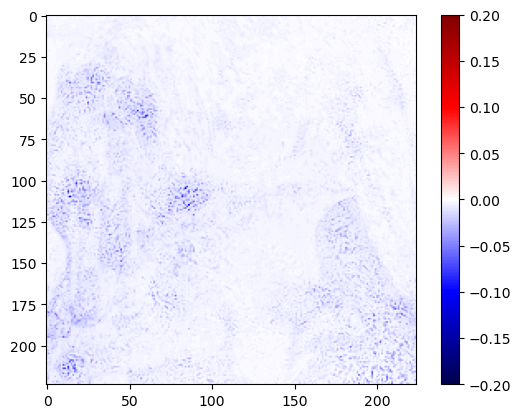

In [46]:
plt.imshow(np.transpose(conf_low, (2, 0, 1)).squeeze(), cmap="seismic")
plt.clim(-0.2, 0.2)
plt.colorbar()

In [53]:
orig_expl = np.transpose(orig_expl, (2, 0, 1))

(224, 1, 224)